In [7]:
import pandas as pd

# Charger le dataset
data = pd.read_csv(r"C:\Users\mouna\Desktop\sales data-set.csv")

# Afficher les premières lignes du dataset
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [9]:
print(data.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [11]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [17]:
# Conversion de la colonne 'Date' en type datetime

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Vérifier la conversion
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [19]:
# Filtrer les données d'un seul magasin et département pour simplifier l'analyse
df_store_dept = data[(data['Store'] == 1) & (data['Dept'] == 1)]

# Indexer par la colonne 'Date'
df_store_dept.set_index('Date', inplace=True)

# Vérifier les premières lignes
df_store_dept.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


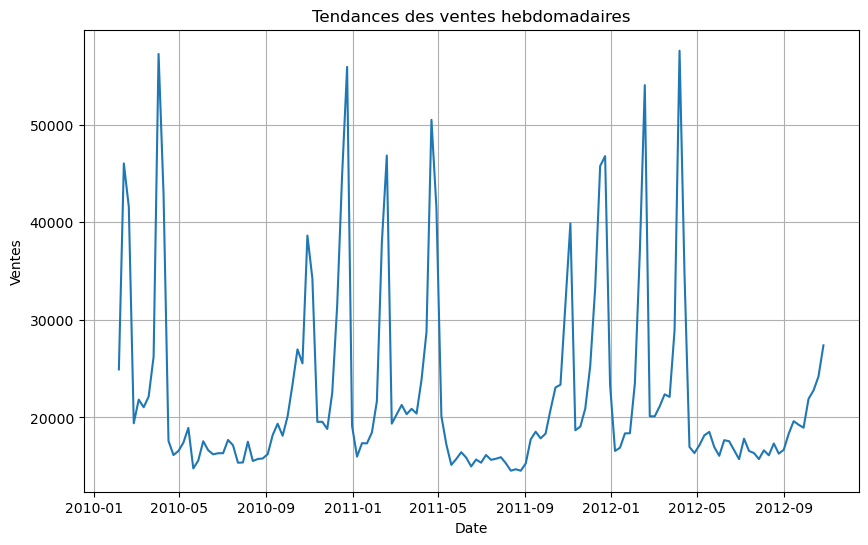

In [21]:
plt.figure(figsize=(10,6))
plt.plot(df_store_dept.index, df_store_dept['Weekly_Sales'], label='Ventes Hebdomadaires')
plt.title('Tendances des ventes hebdomadaires')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.grid(True)
plt.show()


Erreur quadratique moyenne: 354597886.40682685


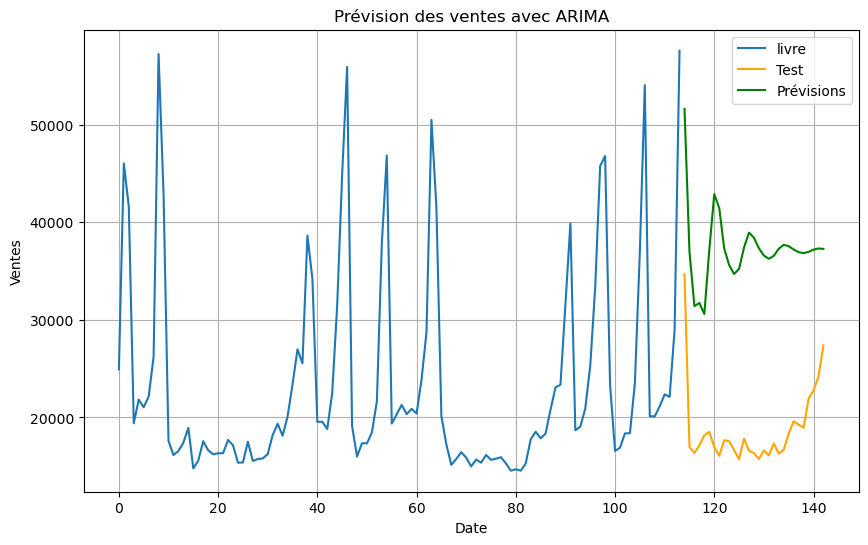

In [33]:


# Filtrer les données pour un magasin et un département spécifique
product_data = data[(data['Store'] == 1) & (data['Dept'] == 1)][['Weekly_Sales']]

# Diviser les données en train/test
prod_size = int(len(product_data) * 0.8)
prod, test = product_data[:prod_size], product_data[prod_size:]

# Appliquer le modèle ARIMA
model = ARIMA(train['Weekly_Sales'], order=(5,1,0))
model_fit = model.fit()

# Faire des prédictions sur l'ensemble de test
predictions = model_fit.forecast(steps=len(test))

# Évaluer le modèle
error = mean_squared_error(test['Weekly_Sales'], predictions)
print(f'Erreur quadratique moyenne: {error}')

# Visualiser les résultats
plt.figure(figsize=(10,6))
plt.plot(prod.index, prod['Weekly_Sales'], label='livre')
plt.plot(test.index, test['Weekly_Sales'], label='Test', color='orange')
plt.plot(test.index, predictions, label='Prévisions', color='green')
plt.title('Prévision des ventes avec ARIMA')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.grid(True)
plt.show()


